# Bangkok Neighborhood Battle : What is the Best New house Project Part 2

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

I read dataset which I scrapping from website in part 1

In [2]:
df = pd.read_excel("Bangkok_newhouse_data.xlsx")

In [3]:
df.head()

,Name,Sub_district,District,Latitude,Longitude,Bedroom,Bathroom,Area,Price
0,คิน หทัยราษฏร์ 37,สามวาตะวันตก,คลองสามวา,13.888578,100.710252,3,3,200,5990000
1,ดิ เออเบิร์น รีเซิร์ฟ พระราม9-มอเตอร์เวย์,สวนหลวง,สวนหลวง,13.725553,100.627438,4,4,516,38000000
2,เดอะ แพลนท์ รามคำแหง-วงแหวน,สะพานสูง,สะพานสูง,13.765469,100.690797,3,3,116,4700000
3,อเวย์ หนองจอก,คู้ฝั่งเหนือ,หนองจอก,13.872420,100.811197,3,3,160,3700000
4,ฟอเรสต้า นิมิตใหม่ 40,สามวาตะวันออก,คลองสามวา,13.899109,100.760595,3,3,149,3000000


I add my workplace to geopy to see a house projects which live around.

In [4]:
address ='ธนาคารทหารไทย สำนักงานใหญ่'
geolocator = Nominatim(user_agent="bkk_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Workplace are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Workplace are 13.8065286, 100.556243.


In [5]:
map_house = folium.Map(location=[13.75398,100.50144], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Sub_district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_house)
    folium.Marker([13.8065286,100.556243]).add_to(map_house)
    
map_house

I use Euclidean distance to figure out the nearest project to my office.

In [6]:
Distance=[]
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    cell={}
    dis = ((lat**2-latitude**2)+(lng**2-longitude**2))**0.5
    cell["Name"]=label
    cell["Distance"]=dis
    Distance.append(cell)

In [7]:
Near_df = pd.DataFrame(Distance)
Near_df.head()

,Name,Distance
0,คิน หทัยราษฏร์ 37,5.767953+0.000000j
1,ดิ เออเบิร์น รีเซิร์ฟ พระราม9-มอเตอร์เวย์,3.477628+0.000000j
2,เดอะ แพลนท์ รามคำแหง-วงแหวน,5.093767+0.000000j
3,อเวย์ หนองจอก,7.291317+0.000000j
4,ฟอเรสต้า นิมิตใหม่ 40,6.610932+0.000000j


In [8]:
Near_df = Near_df.astype({"Distance":"float64"})

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:995: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [9]:
Top10 = Near_df.sort_values("Distance").head(10)
Top10

,Name,Distance
98,ไอนาย กรีนเฮ้าส์,7.514315e-17
93,ไอนาย พูลวิลล่า,7.514315e-17
166,อาธาร์ พหลฯ-อารีย์,8.537463e-17
253,เดอะ เวลตัล พระราม 3,1.484682e-16
11,อานีน่า วิลล่า สาทร - เย็นอากาศ,1.484682e-16
120,บ้าน 365 พระราม 3,1.846138e-16
96,บัวน่า เรสซิเดนซ์,2.058966e-16
85,มัณฑนา พรานนก สาย 2-บางแวก,2.170850e-16
132,ภัสสร พุทธมณฑลสาย 2 - บางแวก,2.170850e-16
47,เดอะ พณา เพชรเกษม-สาย 3,2.170850e-16


In [10]:
index10 = [n for n in Top10["Name"]]
index10

['ไอนาย กรีนเฮ้าส์',
 'ไอนาย พูลวิลล่า',
 'อาธาร์ พหลฯ-อารีย์',
 'เดอะ เวลตัล พระราม 3 ',
 'อานีน่า วิลล่า สาทร - เย็นอากาศ',
 'บ้าน 365 พระราม 3',
 'บัวน่า เรสซิเดนซ์',
 'มัณฑนา พรานนก สาย 2-บางแวก',
 'ภัสสร พุทธมณฑลสาย 2 - บางแวก',
 'เดอะ พณา เพชรเกษม-สาย 3']

In [11]:
df = df.set_index("Name")

In [12]:
Top10_df = df.loc[index10,:]

In [13]:
Top10_df

,Sub_district,District,Latitude,Longitude,Bedroom,Bathroom,Area,Price
Name,,,,,,,,
ไอนาย กรีนเฮ้าส์,ดินแดง,ดินแดง,13.760352,100.555084,4,5,385,35000000
ไอนาย พูลวิลล่า,ดินแดง,ดินแดง,13.760352,100.555084,4,5,517,47000000
อาธาร์ พหลฯ-อารีย์,สามเสนใน,พญาไท,13.778532,100.550417,4,5,570,39000000
เดอะ เวลตัล พระราม 3,ช่องนนทรี,ยานนาวา,13.696412,100.542068,3,4,352,19700000
อานีน่า วิลล่า สาทร - เย็นอากาศ,ช่องนนทรี,ยานนาวา,13.696412,100.542068,5,6,500,53900000
บ้าน 365 พระราม 3,บางโพงพาง,ยานนาวา,13.683658,100.527835,3,5,310,25000000
บัวน่า เรสซิเดนซ์,บางโคล่,บางคอแหลม,13.693988,100.515403,4,5,300,20800000
มัณฑนา พรานนก สาย 2-บางแวก,บางไผ่,บางแค,13.824995,100.491188,3,3,158,13300000
ภัสสร พุทธมณฑลสาย 2 - บางแวก,บางไผ่,บางแค,13.824995,100.491188,3,3,182,8990000


In [14]:
map_10house = folium.Map(location=[13.75398,100.50144], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Top10_df['Latitude'], Top10_df['Longitude'], Top10_df['Sub_district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_10house)
    folium.Marker([13.8065286,100.556243]).add_to(map_10house)
    
map_10house

From 10 Project, they live in 6 sub-district.

In [15]:
CLIENT_ID = 'OEN1NTHKSFFUAZ2PCO1HDKDQL2FW5JFGK3CYDVAZ2SPD4ZBK' # your Foursquare ID
CLIENT_SECRET = 'A1UNGNYHHSXH1T5YDLAC53L2SDHGJOICYB2RPCRWFLRLFAWU' # your Foursquare Secret
ACCESS_TOKEN = 'JGYODNITREJ0E3HFIGJ2UIMUWV25JAJY3BYF10DONHFLWBCW'
search_query = 'Regent Park'
VERSION = 20180604
radius = 500
LIMIT = 100

### Foursquare Part

I use foursquare API help me to look around 6 sub-district. What is the most commom venues of them.

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
house_venues = getNearbyVenues(names=Top10_df['Sub_district'],
                                   latitudes=Top10_df['Latitude'],
                                   longitudes=Top10_df['Longitude']
                                  )

ดินแดง
ดินแดง
สามเสนใน
ช่องนนทรี
ช่องนนทรี
บางโพงพาง
บางโคล่
บางไผ่
บางไผ่
บางไผ่


In [18]:
print(house_venues.shape)
house_venues

(161, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ดินแดง,13.760352,100.555084,ก๋วยเตี๋ยวเย็นตาโฟรสเด็ด แยกประชาสงเคราะห์,13.760170,100.555126,Noodle House
1,ดินแดง,13.760352,100.555084,VIVA-RIS Wedding Studio,13.758407,100.556953,Bridal Shop
2,ดินแดง,13.760352,100.555084,หมูสะเต๊ะเสวยนครปฐม ดินแดง,13.763148,100.555860,Satay Restaurant
3,ดินแดง,13.760352,100.555084,ร้าน ขาหมู พ4,13.763086,100.555966,Thai Restaurant
4,ดินแดง,13.760352,100.555084,ก๋วยเตี๋ยวเป็ดเจ้หมวย,13.763992,100.556180,Thai Restaurant
...,...,...,...,...,...,...,...
156,บางไผ่,13.824995,100.491188,เพชรกุ้งย่าง,13.827961,100.491017,Seafood Restaurant
157,บางไผ่,13.824995,100.491188,เย็นตาโฟโต้คลื่น,13.828890,100.488919,Noodle House
158,บางไผ่,13.824995,100.491188,7-Eleven,13.828560,100.492220,Convenience Store
159,บางไผ่,13.824995,100.491188,เพชรกุ้งย่าง,13.827961,100.491017,Seafood Restaurant


In [19]:
house_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ช่องนนทรี,76,76,76,76,76,76
ดินแดง,40,40,40,40,40,40
บางโคล่,9,9,9,9,9,9
บางโพงพาง,19,19,19,19,19,19
บางไผ่,9,9,9,9,9,9
สามเสนใน,8,8,8,8,8,8


In [20]:
print('There are {} uniques categories.'.format(len(house_venues['Venue Category'].unique())))

There are 50 uniques categories.


In [21]:
# one hot encoding
house_onehot = pd.get_dummies(house_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
house_onehot['Neighborhood'] = house_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [house_onehot.columns[-1]] + list(house_onehot.columns[:-1])
house_onehot = house_onehot[fixed_columns]

house_onehot.head()

,Neighborhood,Asian Restaurant,Auto Garage,Bakery,Bike Rental / Bike Share,Bistro,Bookstore,Breakfast Spot,Brewery,Bridal Shop,...,Soccer Field,Som Tum Restaurant,Soup Place,Spa,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Wings Joint
0,ดินแดง,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ดินแดง,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,ดินแดง,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ดินแดง,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ดินแดง,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
house_grouped = house_onehot.groupby('Neighborhood').mean().reset_index()
house_grouped

,Neighborhood,Asian Restaurant,Auto Garage,Bakery,Bike Rental / Bike Share,Bistro,Bookstore,Breakfast Spot,Brewery,Bridal Shop,...,Soccer Field,Som Tum Restaurant,Soup Place,Spa,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Wings Joint
0,ช่องนนทรี,0.000000,0.026316,0.026316,0.026316,0.00,0.026316,0.026316,0.026316,0.00,...,0.000,0.000000,0.00,0.026316,0.000,0.026316,0.052632,0.026316,0.052632,0.000000
1,ดินแดง,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.000000,0.05,...,0.000,0.000000,0.05,0.000000,0.000,0.000000,0.000000,0.000000,0.100000,0.000000
2,บางโคล่,0.111111,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000,0.111111,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.111111,0.000000
3,บางโพงพาง,0.263158,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.052632,0.052632
4,บางไผ่,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
5,สามเสนใน,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.125,0.000000,0.00,0.000000,0.125,0.000000,0.000000,0.000000,0.125000,0.000000


In [23]:
num_top_venues = 5

for hood in house_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = house_grouped[house_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ช่องนนทรี----
                  venue  freq
0        Ice Cream Shop  0.08
1    Chinese Restaurant  0.08
2  Fast Food Restaurant  0.08
3           Coffee Shop  0.08
4       Thai Restaurant  0.05


----ดินแดง----
               venue  freq
0  Convenience Store  0.35
1       Noodle House  0.25
2    Thai Restaurant  0.10
3        Bridal Shop  0.05
4   Satay Restaurant  0.05


----บางโคล่----
                venue  freq
0  Chinese Restaurant  0.22
1    Asian Restaurant  0.11
2              Buffet  0.11
3        Noodle House  0.11
4         Coffee Shop  0.11


----บางโพงพาง----
               venue  freq
0   Asian Restaurant  0.26
1       Noodle House  0.11
2  Convenience Store  0.11
3        Coffee Shop  0.11
4               Café  0.05


----บางไผ่----
                venue  freq
0        Noodle House  0.33
1   Convenience Store  0.33
2  Seafood Restaurant  0.33
3    Asian Restaurant  0.00
4          Restaurant  0.00


----สามเสนใน----
                venue  freq
0         Coffee Shop  

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = house_grouped['Neighborhood']

for ind in np.arange(house_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(house_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ช่องนนทรี,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Supermarket,Thai Restaurant,Convenience Store,Electronics Store,Flea Market,Food & Drink Shop
1,ดินแดง,Convenience Store,Noodle House,Thai Restaurant,Bistro,Soup Place,Dessert Shop,Bridal Shop,Satay Restaurant,Park,Wings Joint
2,บางโคล่,Chinese Restaurant,Asian Restaurant,Som Tum Restaurant,Coffee Shop,Noodle House,Clothing Store,Buffet,Thai Restaurant,Breakfast Spot,Brewery
3,บางโพงพาง,Asian Restaurant,Coffee Shop,Convenience Store,Noodle House,Pizza Place,Café,Diner,Food Truck,Thai Restaurant,Japanese Restaurant
4,บางไผ่,Convenience Store,Seafood Restaurant,Noodle House,Wings Joint,Chinese Restaurant,Food & Drink Shop,Flea Market,Fast Food Restaurant,Electronics Store,Diner
5,สามเสนใน,Coffee Shop,Golf Driving Range,Thai Restaurant,Stadium,Soccer Field,Restaurant,Burger Joint,Chinese Restaurant,Flea Market,Fast Food Restaurant


### Exploratory Analysis Part

I cleansing data due to easy with calculation analysis.

In [26]:
Top10_df[["Bedroom","Bathroom"]] = Top10_df[["Bedroom","Bathroom"]].astype("int64")
Top10_df[["Area","Price"]] = Top10_df[["Area","Price"]].astype("float64")
Top10_df.dtypes

Sub_district     object
District         object
Latitude        float64
Longitude       float64
Bedroom           int64
Bathroom          int64
Area            float64
Price           float64
dtype: object

In [27]:
df = df.fillna(0)
df.replace(" -"," 0",inplace=True)
df.replace("1,3",0,inplace=True)
df.replace("1,1",0,inplace=True)
df.replace("ติดต่อโครงการ",0,inplace=True)

In [28]:
df[["Bedroom","Bathroom"]] = df[["Bedroom","Bathroom"]].astype("int64")
df[["Area","Price"]] = df[["Area","Price"]].astype("float64")

Find a correlation between features and price

In [29]:
df.corr()["Price"]

Latitude    -0.065797
Longitude   -0.168590
Bedroom      0.482336
Bathroom     0.713116
Area         0.763791
Price        1.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Area', ylabel='Price'>

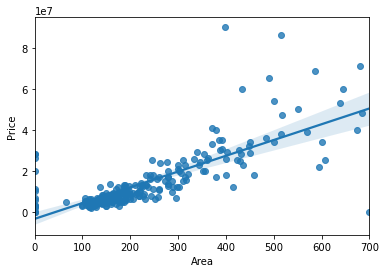

In [30]:
sns.regplot(x=df["Area"],y=df["Price"],data=df)

In [31]:
X = df[['Area']]
Y = df['Price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.583376913463191

In [32]:
features =["Area","Bathroom","Bedroom","Latitude","Longitude"]

In [33]:
lm.fit(df[features],df[["Price"]])
lm.score(df[features],df[["Price"]])

0.6584021595082247

Adjusting Accuracy by using standardize polynomial

In [34]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [35]:
pipe = Pipeline(Input)
pipe.fit(df[features],df[["Price"]])
pipe.score(df[features],df[["Price"]])

0.7780405402858807

In [36]:
Price_pred = pipe.predict(Top10_df[features])

In [37]:
Top10_df["Price_pred"] = np.round(Price_pred,2)

See Real Price VS Predicted Price

In [38]:
Top10_df

,Sub_district,District,Latitude,Longitude,Bedroom,Bathroom,Area,Price,Price_pred
Name,,,,,,,,,
ไอนาย กรีนเฮ้าส์,ดินแดง,ดินแดง,13.760352,100.555084,4,5,385.0,35000000.0,28473261.89
ไอนาย พูลวิลล่า,ดินแดง,ดินแดง,13.760352,100.555084,4,5,517.0,47000000.0,38159527.84
อาธาร์ พหลฯ-อารีย์,สามเสนใน,พญาไท,13.778532,100.550417,4,5,570.0,39000000.0,41873300.68
เดอะ เวลตัล พระราม 3,ช่องนนทรี,ยานนาวา,13.696412,100.542068,3,4,352.0,19700000.0,22671956.74
อานีน่า วิลล่า สาทร - เย็นอากาศ,ช่องนนทรี,ยานนาวา,13.696412,100.542068,5,6,500.0,53900000.0,42112770.37
บ้าน 365 พระราม 3,บางโพงพาง,ยานนาวา,13.683658,100.527835,3,5,310.0,25000000.0,27393741.14
บัวน่า เรสซิเดนซ์,บางโคล่,บางคอแหลม,13.693988,100.515403,4,5,300.0,20800000.0,22812452.58
มัณฑนา พรานนก สาย 2-บางแวก,บางไผ่,บางแค,13.824995,100.491188,3,3,158.0,13300000.0,7165802.46
ภัสสร พุทธมณฑลสาย 2 - บางแวก,บางไผ่,บางแค,13.824995,100.491188,3,3,182.0,8990000.0,7683504.60


In [39]:
S_price = df.groupby(["Sub_district"]).mean().sort_values(["Price"])

Sort all average house price in all sub-districts

In [40]:
S_price.tail(10)

,Latitude,Longitude,Bedroom,Bathroom,Area,Price
Sub_district,,,,,,
นวลจันทร์,13.828573,100.645591,4.50,5.0,245.00,32500122.5
บางเชือกหนัง,13.749350,100.417607,5.00,5.0,600.00,33900000.0
นวมินทร์,13.805367,100.643011,4.00,5.0,399.00,35500000.0
บางพรม,13.751821,100.442925,4.00,5.0,484.00,35900000.0
ช่องนนทรี,13.696412,100.542068,4.00,5.0,426.00,36800000.0
พลับพลา,13.768585,100.616618,4.00,5.0,426.00,38900000.0
สามเสนใน,13.778532,100.550417,4.00,5.0,570.00,39000000.0
ดินแดง,13.760352,100.555084,4.00,5.0,451.00,41000000.0
สวนหลวง,13.725553,100.627438,3.75,4.0,456.25,47000000.0
